In [ ]:
!pip install folium

In [1]:
#Libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.covariance import EllipticEnvelope
from datetime import timedelta
from google.colab import drive
import folium
from folium.plugins import MarkerCluster

In [2]:
drive.mount('/content/drive')

# Especificar la ruta al archivo en Google Drive
ruta_archivo = '/content/drive/MyDrive/data_ig.csv'

# Leer el archivo CSV
datos_rutas = pd.read_csv(ruta_archivo, encoding='latin-1')

# Mostrar los primeros registros para verificar la lectura
print(datos_rutas.head())

# Desmontar Google Drive (si es necesario)
drive.flush_and_unmount()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
         name                                            address       lat  \
0  Kia Soluto  UPC, Peatonal 31, Urdesa, Tarqui, Guayaquil, 0... -2.165442   
1  Kia Soluto  UPC, Peatonal 31, Urdesa, Tarqui, Guayaquil, 0... -2.165442   
2  Kia Soluto  UPC, Peatonal 31, Urdesa, Tarqui, Guayaquil, 0... -2.165442   
3  Kia Soluto  UPC, Peatonal 31, Urdesa, Tarqui, Guayaquil, 0... -2.165442   
4  Kia Soluto  UPC, Peatonal 31, Urdesa, Tarqui, Guayaquil, 0... -2.165442   

         lng                packet_time                               dor  \
0 -79.914622  2021-07-20 21:29:27+00:00  2021-07-20 20:11:59.987099+00:00   
1 -79.914622  2021-07-20 21:29:28+00:00  2021-07-20 20:11:59.987099+00:00   
2 -79.914622  2021-07-20 21:31:58+00:00  2021-07-20 20:11:59.987099+00:00   
3 -79.914622  2021-07-20 21:34:27+00:00  2021-07-20 20:11:59.987099+00:00   
4 -79.914622  202

In [3]:
#creamos una copia para trabajar y hacer limpieza
datos_rutas_copy = datos_rutas.copy

print(datos_rutas.head())
print(datos_rutas.count())
print(datos_rutas.columns)
len(datos_rutas)


         name                                            address       lat  \
0  Kia Soluto  UPC, Peatonal 31, Urdesa, Tarqui, Guayaquil, 0... -2.165442   
1  Kia Soluto  UPC, Peatonal 31, Urdesa, Tarqui, Guayaquil, 0... -2.165442   
2  Kia Soluto  UPC, Peatonal 31, Urdesa, Tarqui, Guayaquil, 0... -2.165442   
3  Kia Soluto  UPC, Peatonal 31, Urdesa, Tarqui, Guayaquil, 0... -2.165442   
4  Kia Soluto  UPC, Peatonal 31, Urdesa, Tarqui, Guayaquil, 0... -2.165442   

         lng                packet_time                               dor  \
0 -79.914622  2021-07-20 21:29:27+00:00  2021-07-20 20:11:59.987099+00:00   
1 -79.914622  2021-07-20 21:29:28+00:00  2021-07-20 20:11:59.987099+00:00   
2 -79.914622  2021-07-20 21:31:58+00:00  2021-07-20 20:11:59.987099+00:00   
3 -79.914622  2021-07-20 21:34:27+00:00  2021-07-20 20:11:59.987099+00:00   
4 -79.914622  2021-07-20 21:36:58+00:00  2021-07-20 20:11:59.987099+00:00   

  signal  speed     ps     ig    sos  mileage  
0      A    0.0  Fal

250840

In [5]:
#Libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.covariance import EllipticEnvelope
from datetime import timedelta
from google.colab import drive
import folium
from folium.plugins import MarkerCluster

drive.mount('/content/drive')

# Especificar la ruta al archivo en Google Drive
ruta_archivo = '/content/drive/MyDrive/data_ig.csv'

# Leer el archivo CSV
datos_rutas = pd.read_csv(ruta_archivo, encoding='latin-1')

# Mostrar los primeros registros para verificar la lectura
print(datos_rutas.head())

# Desmontar Google Drive (si es necesario)
drive.flush_and_unmount()

#creamos una copia para trabajar y hacer limpieza
datos_rutas_copy = datos_rutas.copy

print(datos_rutas.head())
print(datos_rutas.count())
print(datos_rutas.columns)
len(datos_rutas)


# Convertir las columnas de fecha a tipo datetime
datos_rutas['packet_time'] = pd.to_datetime(datos_rutas['packet_time'])
datos_rutas['dor'] = pd.to_datetime(datos_rutas['dor'])

# Identificar paradas basadas en criterios (puedes ajustar estos criterios)
umbral_velocidad = 0.1  # Umbral de velocidad para considerar una parada
umbral_tiempo_parada = pd.Timedelta(minutes=5)  # Duración mínima para considerar una parada

paradas_potenciales = (
    (datos_rutas['speed'] <= umbral_velocidad) &
    (datos_rutas['ig'] == False) &
    (datos_rutas['ps'] == False) &
    (datos_rutas['dor'].diff() >= umbral_tiempo_parada)
)

# Filtrar y mostrar las paradas potenciales
paradas = datos_rutas[paradas_potenciales]
print("Paradas Potenciales:")
print(paradas[['name', 'lat', 'lng', 'packet_time', 'dor', 'speed', 'ig', 'ps']])

# Filtrar las paradas potenciales
paradas = datos_rutas[paradas_potenciales]

# Crear un mapa centrado en la primera parada
mapa = folium.Map(location=[paradas['lat'].iloc[0], paradas['lng'].iloc[0]], zoom_start=13)

# Agrupar los marcadores en un cluster para mejorar la visualización
cluster = MarkerCluster().add_to(mapa)

# Agregar marcadores al mapa para cada parada
for index, parada in paradas.iterrows():
    folium.Marker([parada['lat'], parada['lng']],
                  popup=f"Velocidad: {parada['speed']}, Hora: {parada['packet_time']}",
                  icon=folium.Icon(color='red')).add_to(cluster)

# Mostrar el mapa
mapa

Mounted at /content/drive
         name                                            address       lat  \
0  Kia Soluto  UPC, Peatonal 31, Urdesa, Tarqui, Guayaquil, 0... -2.165442   
1  Kia Soluto  UPC, Peatonal 31, Urdesa, Tarqui, Guayaquil, 0... -2.165442   
2  Kia Soluto  UPC, Peatonal 31, Urdesa, Tarqui, Guayaquil, 0... -2.165442   
3  Kia Soluto  UPC, Peatonal 31, Urdesa, Tarqui, Guayaquil, 0... -2.165442   
4  Kia Soluto  UPC, Peatonal 31, Urdesa, Tarqui, Guayaquil, 0... -2.165442   

         lng                packet_time                               dor  \
0 -79.914622  2021-07-20 21:29:27+00:00  2021-07-20 20:11:59.987099+00:00   
1 -79.914622  2021-07-20 21:29:28+00:00  2021-07-20 20:11:59.987099+00:00   
2 -79.914622  2021-07-20 21:31:58+00:00  2021-07-20 20:11:59.987099+00:00   
3 -79.914622  2021-07-20 21:34:27+00:00  2021-07-20 20:11:59.987099+00:00   
4 -79.914622  2021-07-20 21:36:58+00:00  2021-07-20 20:11:59.987099+00:00   

  signal  speed     ps     ig    sos  mile

In [ ]:
# Filtrar las paradas potenciales
paradas = datos_rutas[paradas_potenciales]

# Crear un mapa centrado en la primera parada
mapa = folium.Map(location=[paradas['lat'].iloc[0], paradas['lng'].iloc[0]], zoom_start=13)

# Agrupar los marcadores en un cluster para mejorar la visualización
cluster = MarkerCluster().add_to(mapa)

# Agregar marcadores al mapa para cada parada
for index, parada in paradas.iterrows():
    folium.Marker([parada['lat'], parada['lng']],
                  popup=f"Velocidad: {parada['speed']}, Hora: {parada['packet_time']}",
                  icon=folium.Icon(color='red')).add_to(cluster)

# Mostrar el mapa
mapa

DETECCION ANOMALIAS

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


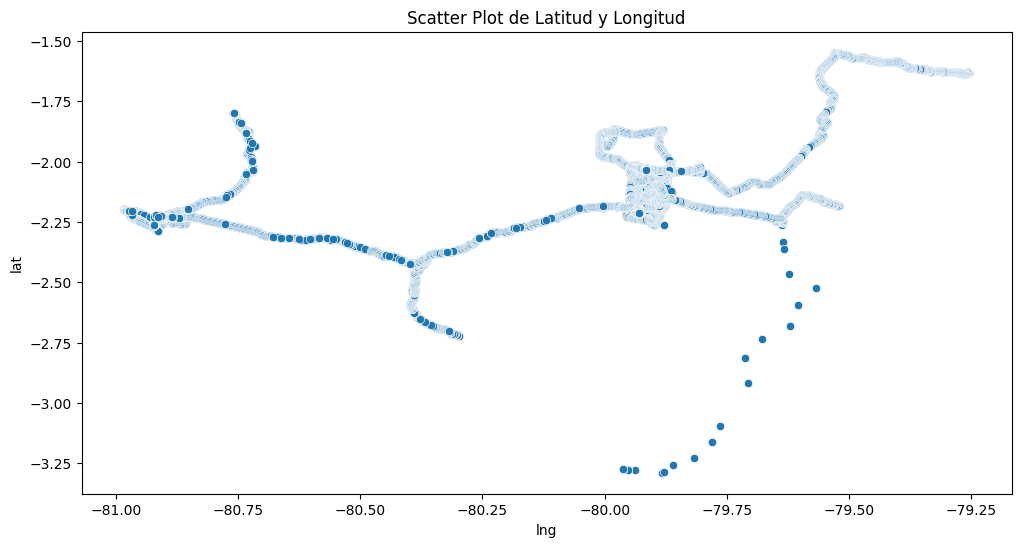

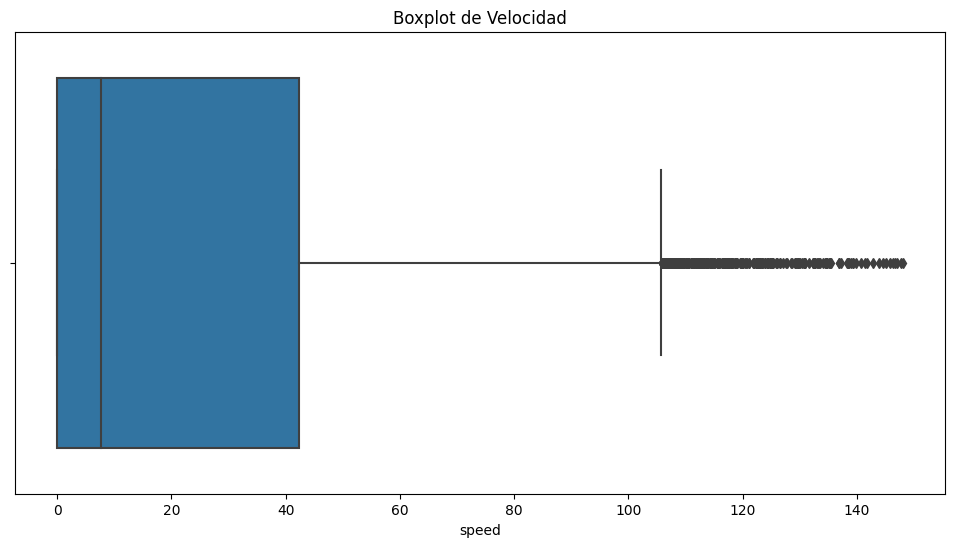

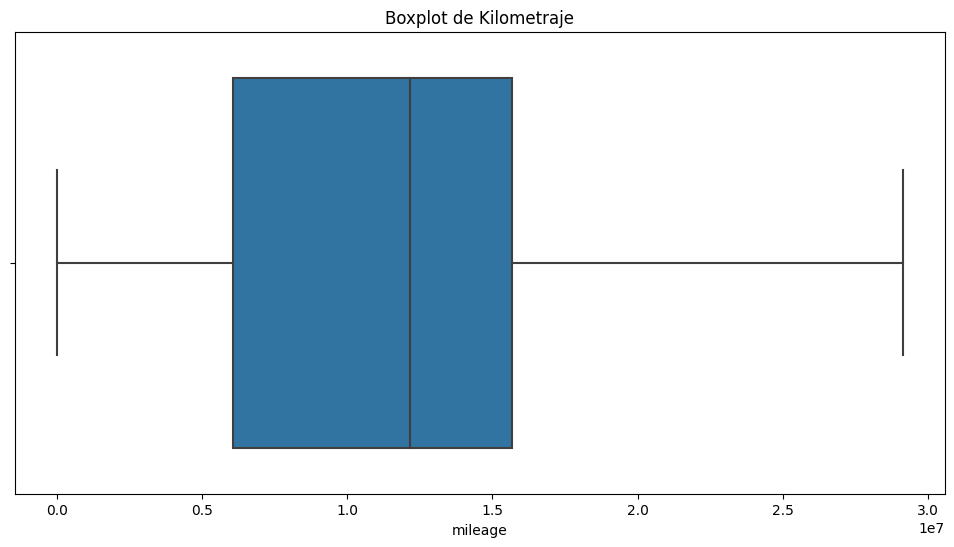

In [8]:
# DETECCION

import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el conjunto de datos

drive.mount('/content/drive')

# Especificar la ruta al archivo en Google Drive
ruta_archivo = '/content/drive/MyDrive/data_ig.csv'

# Leer el archivo CSV
datos_rutas = pd.read_csv(ruta_archivo, encoding='latin-1')

# Aquí asumo que ya has cargado el conjunto de datos en un DataFrame llamado "df"

# Scatter Plot de latitud y longitud
plt.figure(figsize=(12, 6))
sns.scatterplot(x='lng', y='lat', data=datos_rutas)
plt.title('Scatter Plot de Latitud y Longitud')
plt.show()

# Boxplot de velocidad y kilometraje
plt.figure(figsize=(12, 6))
sns.boxplot(x='speed', data=datos_rutas)
plt.title('Boxplot de Velocidad')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='mileage', data=datos_rutas)
plt.title('Boxplot de Kilometraje')
plt.show()



In [9]:
# Estadísticas descriptivas de velocidad y kilometraje
desc_stats_speed = datos_rutas['speed'].describe()
desc_stats_mileage = datos_rutas['mileage'].describe()

print("Estadísticas descriptivas de velocidad:\n", desc_stats_speed)
print("\nEstadísticas descriptivas de kilometraje:\n", desc_stats_mileage)


Estadísticas descriptivas de velocidad:
 count    250840.000000
mean         22.159738
std          27.474640
min           0.000000
25%           0.000000
50%           7.600000
75%          42.300000
max         148.000000
Name: speed, dtype: float64

Estadísticas descriptivas de kilometraje:
 count    2.508400e+05
mean     1.157510e+07
std      6.724367e+06
min      0.000000e+00
25%      6.057333e+06
50%      1.216342e+07
75%      1.566977e+07
max      2.913265e+07
Name: mileage, dtype: float64


In [10]:
from scipy.stats import zscore
from scipy.stats import iqr

# Calcular z-score para velocidad y kilometraje
datos_rutas['speed_zscore'] = zscore(datos_rutas['speed'])
datos_rutas['mileage_zscore'] = zscore(datos_rutas['mileage'])

# Calcular IQR para velocidad y kilometraje
Q1_speed = datos_rutas['speed'].quantile(0.25)
Q3_speed = datos_rutas['speed'].quantile(0.75)
IQR_speed = Q3_speed - Q1_speed

Q1_mileage = datos_rutas['mileage'].quantile(0.25)
Q3_mileage = datos_rutas['mileage'].quantile(0.75)
IQR_mileage = Q3_mileage - Q1_mileage

# Identificar outliers basados en z-score y IQR
outliers_zscore_speed = datos_rutas[(datos_rutas['speed_zscore'] > 3) | (datos_rutas['speed_zscore'] < -3)]
outliers_iqr_speed = datos_rutas[(datos_rutas['speed'] < (Q1_speed - 1.5 * IQR_speed)) | (datos_rutas['speed'] > (Q3_speed + 1.5 * IQR_speed))]

outliers_zscore_mileage = datos_rutas[(datos_rutas['mileage_zscore'] > 3) | (datos_rutas['mileage_zscore'] < -3)]
outliers_iqr_mileage = datos_rutas[(datos_rutas['mileage'] < (Q1_mileage - 1.5 * IQR_mileage)) | (datos_rutas['mileage'] > (Q3_mileage + 1.5 * IQR_mileage))]

print("Outliers basados en Z-Score para velocidad:\n", outliers_zscore_speed)
print("\nOutliers basados en IQR para velocidad:\n", outliers_iqr_speed)
print("\nOutliers basados en Z-Score para kilometraje:\n", outliers_zscore_mileage)
print("\nOutliers basados en IQR para kilometraje:\n", outliers_iqr_mileage)


Outliers basados en Z-Score para velocidad:
               name                                            address  \
23376   Kia Soluto  Vía a la Costa, San Isidro, Gómez Rendón, Juan...   
30039   Kia Soluto                             Not address available.   
30042   Kia Soluto                             Not address available.   
30044   Kia Soluto                             Not address available.   
30048   Kia Soluto                             Not address available.   
...            ...                                                ...   
207960  Kia Soluto  Jaime Nebot Velasco, Río Verde, Santa Elena, E...   
207961  Kia Soluto  Jaime Nebot Velasco, Río Verde, Santa Elena, E...   
207962  Kia Soluto  Jaime Nebot Velasco, Río Verde, Santa Elena, E...   
207963  Kia Soluto  Jaime Nebot Velasco, Río Verde, Santa Elena, E...   
207967  Kia Soluto  Jaime Nebot Velasco, Río Verde, Santa Elena, E...   

             lat        lng                packet_time  \
23376  -2.376605 -80